# Mosaic

Basic example of a mosaic.

## Initialization of the notebook

- Imports
- Loggers
- Paths

In [3]:
import os

from cloudpathlib import AnyPath
from eosets.mosaic import Mosaic
from eoreader.bands import MNDWI, RED, SLOPE, CLOUDS
from eoreader.env_vars import DEM_PATH

In [4]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"))
logs.init_logger(logging.getLogger("eosets"))

In [5]:
# Get the base paths
data_path = AnyPath(r"/home/ds2_db3/CI/eosets/MOSAIC")
db_path = AnyPath(r"/home/ds2_db2/BASES_DE_DONNEES")

In [ ]:
# Set a DEM in order to compte the slope over the mosaic
dem_sub_dir_path = ["GLOBAL", "COPDEM_30m", "COPDEM_30m.vrt"]
os.environ[DEM_PATH] = str(db_path.joinpath(*dem_sub_dir_path))

In [6]:
# Get a list of Sentinel-2 data with the same day
s2_paths = [
    data_path / "S2B_MSIL2A_20220228T102849_N0400_R108_T32TLT_20220228T134712.SAFE",
    data_path / "S2B_MSIL2A_20220228T102849_N0400_R108_T32ULU_20220228T134712.SAFE",
    data_path / "S2B_MSIL2A_20220228T102849_N0400_R108_T32ULV_20220228T134712.SAFE",
]

## Creation of the mosaic

You just have to give the paths to your Sentinel-2 producs.
Their extent or their footprints should be contiguous, and they need to be acquired on the same day.

You can choose a mosaicing method. VRT advised as it is lightweight and faster.

In [ ]:
# Then with compatible
mosaic = Mosaic(s2_paths, mosaic_method="VRT")

## Stack

Create a stack of 4 bands, mosaicing the 3 Sentinel-2 products.

In [7]:
# Stack with a resolution of 60m
stack = mosaic.stack(
    [MNDWI, RED, SLOPE, CLOUDS],
    resolution=60,
)

2023-04-06 14:25:02,633 - [DEBUG] - Loading bands ['SWIR_1', 'GREEN', 'RED']
2023-04-06 14:25:02,637 - [DEBUG] - Read SWIR_1
2023-04-06 14:25:02,871 - [DEBUG] - Manage nodata for band SWIR_1
2023-04-06 14:25:02,912 - [DEBUG] - Converting SWIR_1 to reflectance
2023-04-06 14:25:03,455 - [DEBUG] - Read GREEN
2023-04-06 14:25:03,485 - [DEBUG] - Manage nodata for band GREEN
2023-04-06 14:25:03,525 - [DEBUG] - Converting GREEN to reflectance
2023-04-06 14:25:04,190 - [DEBUG] - Read RED
2023-04-06 14:25:04,218 - [DEBUG] - Manage nodata for band RED
2023-04-06 14:25:04,257 - [DEBUG] - Converting RED to reflectance
2023-04-06 14:25:04,944 - [DEBUG] - Loading indices ['MNDWI']
C:\Users\rbraun\Anaconda3\envs\eosets\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
2023-04-06 14:25:05,685 - [DEBUG] - Loading DEM bands ['SLOPE']
2023-04-06 14:25:05,685 - [DEBUG] - Warping DEM for 20220228T102849_S2_T32TLT_

In [10]:
# Scale the mosaic in order to print it
from sertit.display import scale
scaled = stack.copy(data=scale(stack.data))

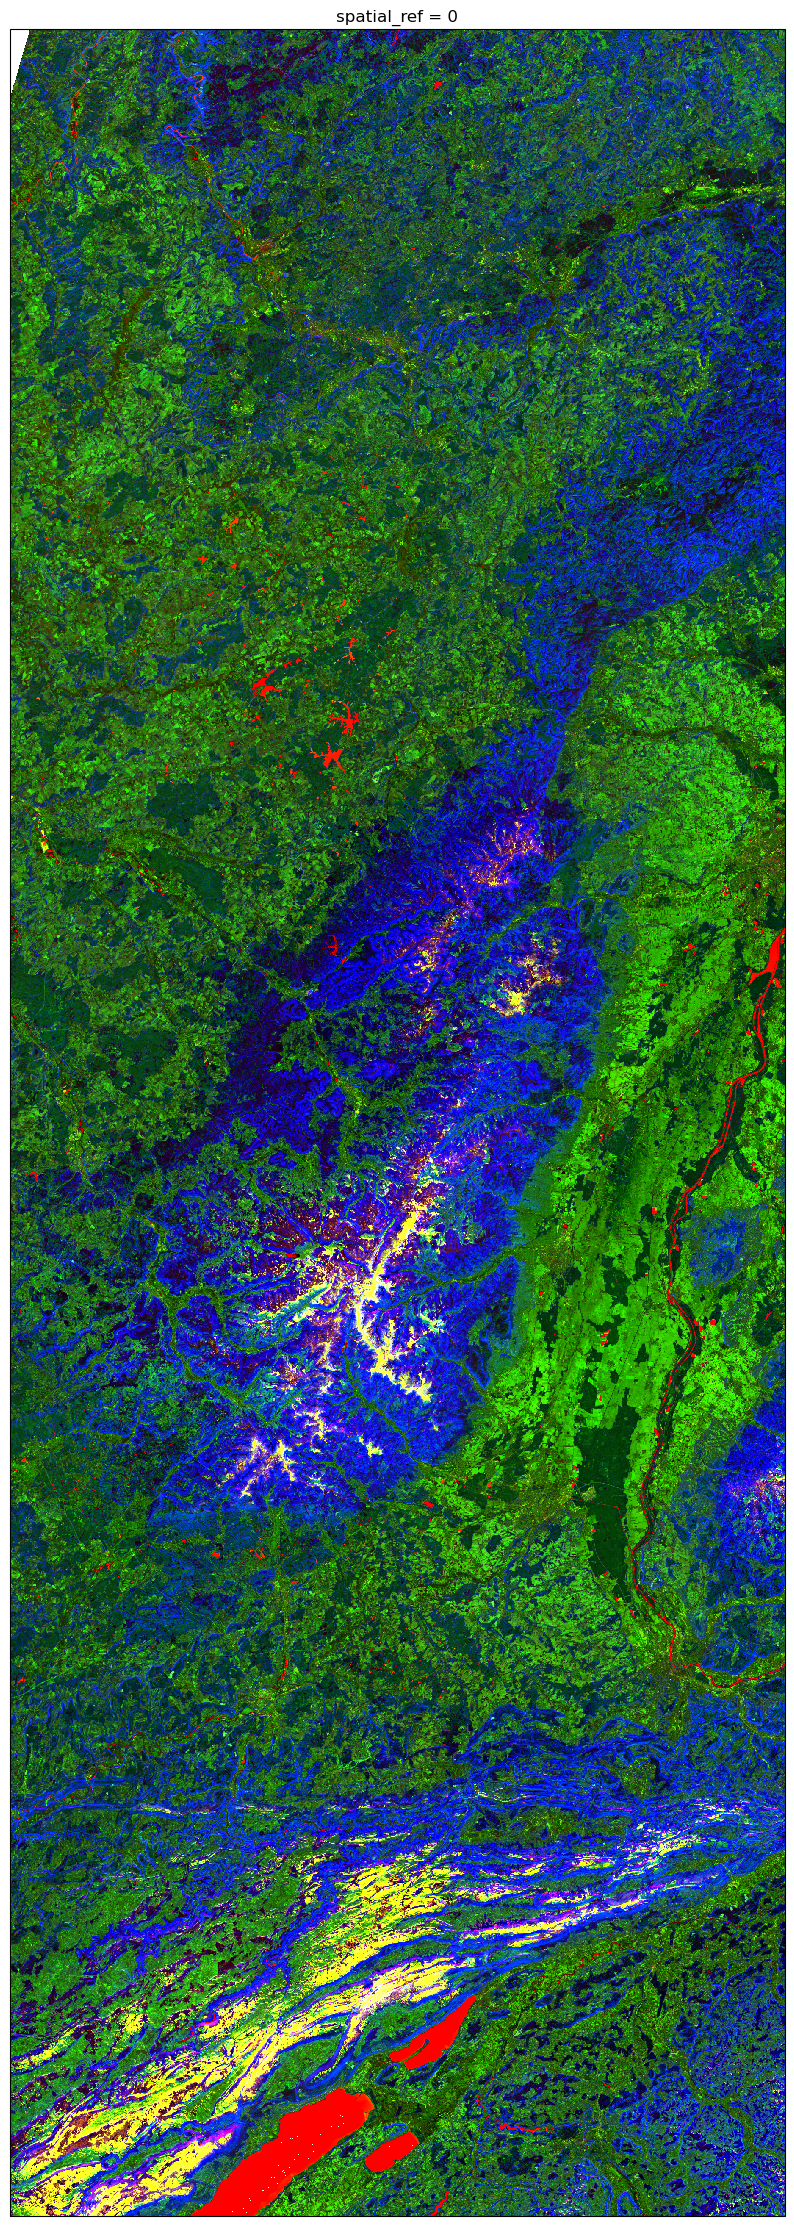

In [35]:
# Plot the mosaic
import cartopy.crs as ccrs
crs = ccrs.UTM("32")
scaled[0:3, :, :].plot.imshow(
    robust=True,
    transform=crs,
    x="x",
    y="y",
    figsize=[10, 30],
    subplot_kws={'projection':crs}
)